<a href="https://colab.research.google.com/github/Ranjith3900/Sample_Projects/blob/main/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective 
---
  The objective is to build a model that  detects the emotion hidden in the text comments. The emotons include happiness,sadness,worry, love etc.,

## 1. Import Libraries
---

In [ ]:
import pandas as pd
import nltk
import spacy
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

## 2. Import the Data
---

In [ ]:
emotion_data = pd.read_csv('https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Final_Emotion_Data/Final_Emotion_Data.csv')
emotion_data.head(20)

,Id,Emotion,Text
0,1,anger,im grabbing a minute to post i feel greedy wrong
1,1,sadness,i didnt feel humiliated
2,2,sadness,i can go from feeling so hopeless to so damned...
3,4,love,i am ever feeling nostalgic about the fireplac...
4,5,anger,i am feeling grouchy
5,6,sadness,ive been feeling a little burdened lately wasn...
6,7,surprise,ive been taking or milligrams or times recomme...
7,8,fear,i feel as confused about life as a teenager or...
8,9,happiness,i have been with petronas for years i feel tha...
9,10,love,i feel romantic too


In [ ]:
emotion_data.shape

(56000, 3)

In [ ]:
emotion_data.columns

Index(['Id', 'Emotion', 'Text'], dtype='object')

In [ ]:
emotion_data.isna().sum()

Id         0
Emotion    0
Text       0
dtype: int64

## 3. Get the unique list of emotions and their frequency counts.
---

In [ ]:
emotion_data['Emotion'].unique()

array(['anger', 'sadness', 'love', 'surprise', 'fear', 'happiness',
       'empty', 'enthusiasm', 'neutral', 'worry', 'fun', 'hate',
       'boredom', 'relief'], dtype=object)

In [ ]:
emotion_data['Emotion'].value_counts()

happiness     10571
sadness        9831
neutral        8638
worry          8459
love           5146
surprise       2759
anger          2269
fear           1937
fun            1776
relief         1526
hate           1323
empty           827
enthusiasm      759
boredom         179
Name: Emotion, dtype: int64

## 4. Text Preprocessing
---

#### 4.1 Converting everything to String and Lowercase

In [ ]:
emotion_data['Text_lowercase'] = emotion_data['Text'].apply(lambda x:str(x).lower())
emotion_data[['Text','Text_lowercase']]

,Text,Text_lowercase
0,im grabbing a minute to post i feel greedy wrong,im grabbing a minute to post i feel greedy wrong
1,i didnt feel humiliated,i didnt feel humiliated
2,i can go from feeling so hopeless to so damned...,i can go from feeling so hopeless to so damned...
3,i am ever feeling nostalgic about the fireplac...,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,i am feeling grouchy
...,...,...
55995,@JohnLloydTaylor,@johnlloydtaylor
55996,Happy Mothers Day All my love,happy mothers day all my love
55997,Happy Mother's Day to all the mommies out ther...,happy mother's day to all the mommies out ther...
55998,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,@niariley wassup beautiful!!! follow me!! pee...


#### 4.2 Tokenizing
 - Dividing whole sentence into word tokens

In [ ]:
from nltk.tokenize import word_tokenize
emotion_data['Text_tokens'] = emotion_data['Text_lowercase'].apply(lambda x : word_tokenize(str(x)))
emotion_data[['Text','Text_tokens']].sample(5)

,Text,Text_tokens
26503,@spidermonkeyloo Were you going to come? The v...,"[@, spidermonkeyloo, were, you, going, to, com..."
9545,i feel honored to have been on the show and my...,"[i, feel, honored, to, have, been, on, the, sh..."
19668,eww. cant sleep and its 2:38 am,"[eww, ., cant, sleep, and, its, 2:38, am]"
39861,@FOOLYWANG I hope so too. How are you?,"[@, foolywang, i, hope, so, too, ., how, are, ..."
710,i cant help but feel a longing to be outside m...,"[i, cant, help, but, feel, a, longing, to, be,..."


#### 4.3 Expanding short forms

In [ ]:
contra_Expan_Dict = {"ain't": "am not","aren't": "are not","can't": "cannot","can't've": "cannot have","'cause": "because",
"could've": "could have","couldn't": "could not","couldn't've": "could not have","didn't": "did not",
"doesn't": "does not","don't": "do not","hadn't": "had not","hadn't've": "had not have","hasn't": "has not",
"haven't": "have not","he'd": "he would","he'd've": "he would have","he'll": "he will","he'll've": "he will have",
"he's": "he is","how'd": "how did","how'd'y": "how do you","how'll": "how will",
"how's": "how does","i'd": "i would","i'd've": "i would have","i'll": "i will","i'll've": "i will have","i'm": "i am",
"i've": "i have","isn't": "is not","it'd": "it would","it'd've": "it would have","it'll": "it will","it'll've": "it will have",
"it's": "it is","let's": "let us","ma`am": "madam","mayn't": "may not","might've": "might have","mightn't": "might not",
"mightn't've": "might not have","must've": "must have","mustn't": "must not","mustn't've": "must not have","needn't": "need not","needn't've": "need not have",
"o'clock": "of the clock","oughtn't": "ought not","oughtn't've": "ought not have","shan't": "shall not",
"sha'n't": "shall not","shan't've": "shall not have","she'd": "she would",
"she'd've": "she would have","she'll": "she will","she'll've": "she will have",
"she's": "she is","should've": "should have","shouldn't": "should not","shouldn't've": "should not have","so've": "so have","so's": "so is",
"that'd": "that would","that'd've": "that would have","that's": "that is","there'd": "there would","there'd've": "there would have","there's": "there is",
"they'd": "they would","they'd've": "they would have","they'll": "they will","they'll've": "they will have","they're": "they are","they've": "they have",
"to've": "to have","wasn't": "was not"," u ": " you "," ur ": " your "," n ": " and ","won't": "would not",
"dis": "this","bak": "back","brng": "bring","im":"i am","you're":"you are","lol": "laugh","iTouch": "i Touch"}

In [ ]:
def expanded_form(x):
  if x in contra_Expan_Dict.keys():
    return(contra_Expan_Dict[x])
  else:
    return(x)


In [ ]:
x = str(emotion_data['Text_lowercase'][50854])
print(x)
x = x.split()
print([expanded_form(t) for t in x])

restoring new itouch 2.  excited to use it. yeeeeeeeee. goodbye itouch 1.
['restoring', 'new', 'itouch', '2.', 'excited', 'to', 'use', 'it.', 'yeeeeeeeee.', 'goodbye', 'itouch', '1.']


In [ ]:
emotion_data['Text_expand_form'] = emotion_data['Text_lowercase'].apply(lambda x : [expanded_form(t) for t in str(x).split()])
emotion_data[['Text','Text_expand_form']].sample(10)

,Text,Text_expand_form
2942,i feel no remorse about doing this it was unsu...,"[i, feel, no, remorse, about, doing, this, it,..."
15043,i can sit here and say its a warm feeling that...,"[i, can, sit, here, and, say, its, a, warm, fe..."
47738,@androidtomato Hello Gorgeous GIRL! Nice new p...,"[@androidtomato, hello, gorgeous, girl!, nice,..."
47716,you can learn a lot from another person.. dont...,"[you, can, learn, a, lot, from, another, perso..."
24334,Pretty sure I'm sat on the wrong train going t...,"[pretty, sure, i am, sat, on, the, wrong, trai..."
22886,@jamie_oliver damn i got it right! i suppose i...,"[@jamie_oliver, damn, i, got, it, right!, i, s..."
22569,@lanceseabourn I know but this sub is sooooo ...,"[@lanceseabourn, i, know, but, this, sub, is, ..."
49693,I just received a mothers day card from my lov...,"[i, just, received, a, mothers, day, card, fro..."
27600,@dougiemcfly stuck from tom i guess... hope ...,"[@dougiemcfly, stuck, from, tom, i, guess..., ..."
5779,i feel like i should make one of these for eve...,"[i, feel, like, i, should, make, one, of, thes..."


#### 4.4 Remove Stop Words

In [ ]:
from nltk.corpus import stopwords
nltk_stop_words = set(stopwords.words('english'))

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS as spacy_stopwords

In [ ]:
emotion_data['Text_stop_words'] = emotion_data['Text_expand_form'].apply(lambda x : [t for t in x if t not in spacy_stopwords])
emotion_data[['Text','Text_stop_words']]

,Text,Text_stop_words
0,im grabbing a minute to post i feel greedy wrong,"[i am, grabbing, minute, post, feel, greedy, w..."
1,i didnt feel humiliated,"[didnt, feel, humiliated]"
2,i can go from feeling so hopeless to so damned...,"[feeling, hopeless, damned, hopeful, cares, aw..."
3,i am ever feeling nostalgic about the fireplac...,"[feeling, nostalgic, fireplace, know, property]"
4,i am feeling grouchy,"[feeling, grouchy]"
...,...,...
55995,@JohnLloydTaylor,[@johnlloydtaylor]
55996,Happy Mothers Day All my love,"[happy, mothers, day, love]"
55997,Happy Mother's Day to all the mommies out ther...,"[happy, mother's, day, mommies, there,, woman,..."
55998,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,"[@niariley, wassup, beautiful!!!, follow, me!!..."


#### 4.5 Regular Expressions

In [ ]:
import re

In [ ]:
def clean_with_re(x):
  x = str(x)
  x=re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'," ", x) 
  x=re.sub(r'[^\w ]+', "", x) 
  x=re.sub(r"[,!@&\'?\.$%_]"," ", x) 
  x=re.sub(r"\d+"," ", x) 
  return(x)

In [ ]:
emotion_data['Text_RE'] = emotion_data['Text_stop_words'].apply(lambda x : clean_with_re(x))
emotion_data[['Text','Text_RE']]

,Text,Text_RE
0,im grabbing a minute to post i feel greedy wrong,i am grabbing minute post feel greedy wrong
1,i didnt feel humiliated,didnt feel humiliated
2,i can go from feeling so hopeless to so damned...,feeling hopeless damned hopeful cares awake
3,i am ever feeling nostalgic about the fireplac...,feeling nostalgic fireplace know property
4,i am feeling grouchy,feeling grouchy
...,...,...
55995,@JohnLloydTaylor,johnlloydtaylor
55996,Happy Mothers Day All my love,happy mothers day love
55997,Happy Mother's Day to all the mommies out ther...,happy mothers day mommies there woman man long...
55998,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,niariley wassup beautiful follow me peep new h...


In [ ]:
emotion_data[['Text','Text_RE']].sample(20)

,Text,Text_RE
26043,not really in the twitter mood today... i don'...,twitter mood today do not know
43105,I need a break! I NEED KITKAT! haha!,need break need kitkat haha
44545,they tryna get me 2 sing on mic n i said NO NO...,tryna sing mic n said noooooooo
15096,i want to stop taking it one day but also feel...,want stop taking day feel terrified lots feeli...
3590,i feel very slutty,feel slutty
50971,@TickleMeJoey goodnight baby loll jk night,ticklemejoey goodnight baby loll jk night
52877,says again.. happy mothers day to all your mom...,says again happy mothers day moms
34188,@iliveinbetween i graduate at 9am on Sunday Ju...,iliveinbetween graduate am sunday june th
16053,@Mennard time diff and i've just been wrapped ...,mennard time diff i have wrapped day day stuff...
19420,@Damevegas am alive but at work finish at ...,damevegas alive work finish sun


#### 4.6 Spelling Correction

In [ ]:
from textblob.blob import TextBlob
corrected_emotion = TextBlob('Text').correct()
corrected_emotion

TextBlob("Next")

#### 4.7 Lemmatization (or) Root Form

In [ ]:
spacy_model = spacy.load('en_core_web_sm')

In [ ]:
emotion_data['Text_lemmatize'] = emotion_data['Text_RE'].apply(lambda x : " ".join([t.lemma_ for t in spacy_model(str(x)) if t.lemma_ != "-PRON-"]))
emotion_data[['Text','Text_lemmatize']]

,Text,Text_lemmatize
0,im grabbing a minute to post i feel greedy wrong,I be grab minute post feel greedy wrong
1,i didnt feel humiliated,do not feel humiliate
2,i can go from feeling so hopeless to so damned...,feel hopeless damn hopeful care awake
3,i am ever feeling nostalgic about the fireplac...,feel nostalgic fireplace know property
4,i am feeling grouchy,feel grouchy
...,...,...
55995,@JohnLloydTaylor,johnlloydtaylor
55996,Happy Mothers Day All my love,happy mother day love
55997,Happy Mother's Day to all the mommies out ther...,happy mother day mommy there woman man long yo...
55998,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,niariley wassup beautiful follow I peep new hi...


In [ ]:
emotion_data[['Text','Text_lemmatize']].sample(20)

,Text,Text_lemmatize
38137,I think today I shall listen to some Gary Numa...,think today shall listen gary numan start remixe
19454,Bacon Fail. Ended up with a commiseration muffin,bacon fail end commiseration muffin
7326,i am excited to be introduced to a new kind of...,excite introduce new kind library environment ...
34462,@rmwiley i feel you girl,rmwiley feel girl
48101,gahh. my freaking lip ring is going to be the ...,gahh freaking lip ring go death I cooraperate ...
32160,@ragavin is there anything Brian or I can do?,ragavin brian do
55089,@backstreetboys Congrats to Howie! I hope you ...,backstreetboys congrats howie hope bring littl...
15889,ive decided to intentionally make it easier on...,I ve decide intentionally easier make feel wim...
34692,i was so bored i decided to iron all my baju s...,bored decide iron baju sklh thn realize hate t...
26126,I feel like I have to throw up.,feel like throw up


#### 4.8 Final Cleaning after Lemmatization

In [ ]:
spacy_stopwords.update({'didnt','its','dont','srry','woooooow','it s','u'})
emotion_data['Text_final_clean'] = emotion_data['Text_lemmatize'].apply(lambda x : [t for t in str(x).split() if t not in spacy_stopwords])
emotion_data['Text_final_clean_tokens'] = emotion_data['Text_final_clean'].apply(lambda x : " ".join(x))
emotion_data[['Text','Text_final_clean_tokens']]

,Text,Text_final_clean_tokens
0,im grabbing a minute to post i feel greedy wrong,I grab minute post feel greedy wrong
1,i didnt feel humiliated,feel humiliate
2,i can go from feeling so hopeless to so damned...,feel hopeless damn hopeful care awake
3,i am ever feeling nostalgic about the fireplac...,feel nostalgic fireplace know property
4,i am feeling grouchy,feel grouchy
...,...,...
55995,@JohnLloydTaylor,johnlloydtaylor
55996,Happy Mothers Day All my love,happy mother day love
55997,Happy Mother's Day to all the mommies out ther...,happy mother day mommy woman man long momma day
55998,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,niariley wassup beautiful follow I peep new hi...


In [ ]:
emotion_data[['Text','Text_final_clean_tokens']].sample(20)

,Text,Text_final_clean_tokens
24649,Bird poo update... Managed to clean it all off...,bird poo update manage clean slight stainage r...
19197,morning all....beautiful day...best go enjoy s...,morning allbeautiful dayb enjoy sunshine worku...
19201,The stars are out. Where were you when I neede...,star need
5283,when i heard what mark i had got at the entran...,hear mark entrance examination realize admitta...
40846,Hey there! It's a glorious morning! Monday's a...,hey glorious morning monday animation mode
29749,"@sampan22 they did,",sampan
5169,im feeling very listless,I feel listless
49847,@icammodel thank you,icammodel thank
49225,Going to bed! Happy mother's day for every mom...,bed happy mother day mom
15184,i feel like i can read all the articles and bl...,feel like read article blogs press releases ak...


## 5. Word Cloud and highlight the most frequent words.
---

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
final_emotion_data = " ".join(emotion_data['Text_final_clean_tokens'])
len(final_emotion_data)

2453323

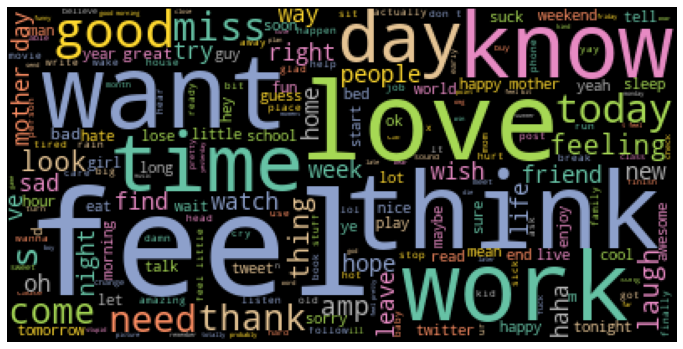

In [ ]:
plt.figure(figsize = (12, 12), facecolor = None) 
wc=WordCloud(colormap='Set2').generate(final_emotion_data)
plt.imshow(wc)
plt.axis("off")
plt.show()

## 6. Document Term Matrix
---

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer(min_df=5)
dtm_v1 = pd.DataFrame(countvec.fit_transform(emotion_data['Text_final_clean_tokens']).toarray(), columns=countvec.get_feature_names(), index=None)
print(dtm_v1.shape)


(56000, 6380)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
dtm_v1

,aa,aaaah,aaah,aah,aaron,ab,abandon,abby,abc,abide,...,zack,zealand,zero,zoe,zombie,zone,zoo,zoom,ztnewetnorb,ãââ½
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dtm_v1.columns

Index(['aa', 'aaaah', 'aaah', 'aah', 'aaron', 'ab', 'abandon', 'abby', 'abc',
       'abide',
       ...
       'zack', 'zealand', 'zero', 'zoe', 'zombie', 'zone', 'zoo', 'zoom',
       'ztnewetnorb', 'ãââ½'],
      dtype='object', length=6380)

# 7. Sentiment Analysis
---

### Algorithm

### Features

In [ ]:
emotion_data['Emotion'].value_counts()

happiness     10571
sadness        9831
neutral        8638
worry          8459
love           5146
surprise       2759
anger          2269
fear           1937
fun            1776
relief         1526
hate           1323
empty           827
enthusiasm      759
boredom         179
Name: Emotion, dtype: int64

In [ ]:
dtm_v1['Emotion'] = emotion_data['Emotion']
dtm_v1 = dtm_v1[(dtm_v1['Emotion'] == 'happiness') | (dtm_v1['Emotion'] == 'sadness')]     # Consider only two variables like happiness and sadness.
print(dtm_v1['Emotion'].value_counts())

happiness    10571
sadness       9831
Name: Emotion, dtype: int64


### Train data and Test data

In [ ]:
from sklearn.model_selection import train_test_split
x = dtm_v1.drop(['Emotion'],axis=1)
y = dtm_v1['Emotion']
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size= 0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(16321, 6380)
(16321,)
(4081, 6380)
(4081,)


## 8. Naive Bayes Model
---

In [ ]:
from sklearn.naive_bayes import MultinomialNB
emotion_model = MultinomialNB()
emotion_model.fit(x_train,y_train)


MultinomialNB()

In [ ]:
print('Train Accuracy : ',emotion_model.score(x_train,y_train))
print('Test Accuracy : ',emotion_model.score(x_test,y_test))


Train Accuracy :  0.9051528705348937
Test Accuracy :  0.8642489585885812


In [ ]:
prediction_emotion = emotion_model.predict(x_test)
print(prediction_emotion)

['happiness' 'happiness' 'happiness' ... 'sadness' 'happiness' 'sadness']
